<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_12296\1954740267.py:29: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(d_values, pdf_values, label=f'$\lambda = {lambda_val}$')
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_12296\1954740267.py:31: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Visualization of $\lambda e^{-\lambda d_{i,j}}$ (Exponential PDF)')


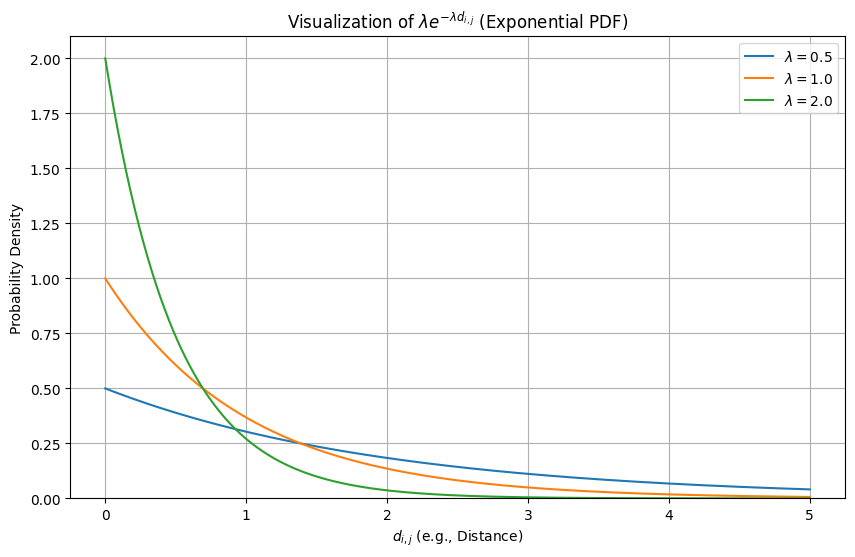

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_pdf(d, lambda_val):
  """
  Calculates the value of the exponential probability density function.

  Args:
    d: The variable (e.g., distance or time).
    lambda_val: The rate parameter (lambda).

  Returns:
    The value of lambda * e^(-lambda * d).
  """
  return lambda_val * np.exp(-lambda_val * d)

# --- Visualization ---

# Define a range for 'd' (e.g., distance)
d_values = np.linspace(0, 5, 500) # From 0 to 5, with 500 points

# Choose different lambda values to see their effect
lambda_values = [0.5, 1.0, 2.0]

plt.figure(figsize=(10, 6))

for lambda_val in lambda_values:
  pdf_values = exponential_pdf(d_values, lambda_val)
  plt.plot(d_values, pdf_values, label=f'$\lambda = {lambda_val}$')

plt.title('Visualization of $\lambda e^{-\lambda d_{i,j}}$ (Exponential PDF)')
plt.xlabel('$d_{i,j}$ (e.g., Distance)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.ylim(bottom=0) # Ensure y-axis starts at 0
plt.show()

In [39]:
import json

with open('D:/work_dir/Datasets/LoRa_anomaly-detection/data/tuc_lora_metadata.mqtt_data_22-27_4gw.json') as file1:
        ds_json = json.load(file1)

In [86]:
len(ds_json)

910

In [35]:
def id_to_int_mapping(ds):
    """
    Maps deduplication IDs to integers for easier processing.

    Args:
        ds_json: List of dictionaries containing dataset items.

    Returns:
        A dictionary mapping deduplication IDs to integers.
    """
    unique_ids = list({item['deduplicationId'] for item in ds})
    id_to_int = {uid: idx+1 for idx, uid in enumerate(unique_ids)}  # 1-based indexing
    
    for item in ds:
        item['deduplicationId'] = id_to_int[item['deduplicationId']]
    return ds

ds_json_new = id_to_int_mapping(ds_json)


In [25]:
with open('D:/work_dir/Datasets/LoRa_anomaly-detection/data/tuc_lora_gateways.json') as file2:
    gw_loc = json.load(file2)



In [87]:
for idx, event in enumerate(ds_json):
    print(idx,event)

0 {'_id': {'$oid': '6746ec5da1b6df3e6df87508'}, 'deduplicationId': '5609d83a-e4f0-4bc4-b601-6ef9b0410ec7', 'time': '2024-11-27T09:54:36.987309+00:00', 'deviceInfo': {'tenantId': '52f14cd4-c6f1-4fbd-8f87-4025e1d49242', 'tenantName': 'ChirpStack', 'applicationId': '58e920e9-56d0-4ee1-8fbf-0134826738fc', 'applicationName': 'ed_metadata_collector', 'deviceProfileId': '1c1f9d22-12ea-428f-b460-1cfa524aa078', 'deviceProfileName': 'test_script', 'deviceName': 'MKR_WAN_4', 'devEui': 'a8610a34324c770e', 'deviceClassEnabled': 'CLASS_A', 'tags': {}}, 'devAddr': '01e3a8a6', 'adr': True, 'dr': 5, 'fCnt': 450, 'fPort': 2, 'confirmed': True, 'data': 'VGVtcGVyYXR1cmU6IDIwLDEyMzQ1Njc4LCBIdW1pZGl0eTogNjguMTIzNDU2Nzg=', 'rxInfo': [{'gatewayId': '7076ff005607214b', 'uplinkId': 20793, 'gwTime': '2024-11-27T09:54:36.987309+00:00', 'nsTime': '2024-11-27T09:54:36.998469031+00:00', 'rssi': -86, 'snr': 7.2, 'channel': 7, 'board': 263, 'location': {'latitude': 50.8139762878418, 'longitude': 12.92799186706543, 'al

In [ ]:

gwid_int = {gw_id: idx+1 for idx, gw_id in enumerate(gw_loc)}  
int_to_gw_id = {idx+1: gw_id for idx, gw_id in enumerate(gw_loc.keys())}

In [37]:
for i in ds_json:
    for j in i['rxInfo']:
        j['gatewayId'] = gwid_int[j['gatewayId']]

In [38]:
for i in ds_json:
    for j in i['rxInfo']:
        j['gatewayId'] = int_to_gw_id[j['gatewayId']]

In [45]:
unique_ids = list({item['_id']['$oid'] for item in ds_json})
id_to_int = {uid: idx+1 for idx, uid in enumerate(unique_ids)}  # 1-based indexing

for item in ds_json:
    item['_id_int'] = id_to_int[item['_id']['$oid']]

In [75]:
from datetime import datetime, timezone

# ts_str = ds_json[0]['time']
ts_str = '2024-11-27T09:54:36.998469031+00:00'
dt_object = datetime.fromisoformat(ts_str)
dt_object_utc = dt_object.astimezone(timezone.utc)

sample data {'event_idx': 0, 'gateway_idx': 0, 'timestamp': np.float64(-0.4816953462314126)}

In [79]:
dt_object_utc.microsecond

998469

In [59]:
ds_json[:]['_id_int'==1]['rxInfo'][0]

{'gatewayId': '7076ff005607214b',
 'uplinkId': 20793,
 'gwTime': '2024-11-27T09:54:36.987309+00:00',
 'nsTime': '2024-11-27T09:54:36.998469031+00:00',
 'rssi': -86,
 'snr': 7.2,
 'channel': 7,
 'board': 263,
 'location': {'latitude': 50.8139762878418,
  'longitude': 12.92799186706543,
  'altitude': 350},
 'context': 'DY/8NA==',
 'metadata': {'region_config_id': 'eu868', 'region_common_name': 'EU868'},
 'crcStatus': 'CRC_OK'}

In [83]:
from datetime import datetime, timezone, timedelta
import re

def convert_iso_to_nanoseconds_since_epoch_precise(iso_timestamp_str):
    """
    Converts an ISO 8601 timestamp string to an integer representing
    total nanoseconds since the Unix epoch (Jan 1, 1970 UTC).

    This function is designed to handle and preserve nanosecond precision
    if it exists in the fractional seconds part of the input string,
    as standard `datetime.fromisoformat` truncates to microseconds.

    Args:
        iso_timestamp_str (str): The timestamp string in ISO 8601 format,
                                 e.g., '2024-11-27T02:51:28.363217890+00:00'.

    Returns:
        int: The timestamp in nanoseconds since the Unix epoch.
        None: If there's an error parsing the timestamp.
    """
    try:
        # Regex to split the timestamp into main part, fractional part, and timezone part
        # Handles optional fractional seconds and optional timezone info (+HH:MM, -HH:MM, or Z for UTC)
        match = re.match(r"(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2})(?:\.(\d+))?([Z+\-].*)?", iso_timestamp_str)
        if not match:
            raise ValueError("Invalid ISO 8601 format")

        main_part_str, fractional_str, tz_part_str = match.groups()

        # Parse the main part of the datetime string
        dt_object = datetime.fromisoformat(main_part_str)

        # Handle timezone information
        if tz_part_str:
            if tz_part_str.upper() == 'Z': # 'Z' denotes UTC
                dt_object = dt_object.replace(tzinfo=timezone.utc)
            else: # Parse explicit offset like +00:00 or +01:00
                # fromisoformat handles explicit offsets if they are part of the main string.
                # If parsed separately, we need to handle them. For simplicity, we'll
                # stick to fromisoformat for the full string or ensure it's UTC.
                # For robustness, always convert to UTC
                dt_object = datetime.fromisoformat(main_part_str + tz_part_str).astimezone(timezone.utc)
        else:
            # If no timezone info, assume UTC for consistent epoch conversion.
            # Or, if your data implicitly implies a specific local timezone, convert to that
            # timezone-aware object before astimezone(timezone.utc).
            dt_object = dt_object.replace(tzinfo=timezone.utc)

        # Convert to UTC to ensure consistent epoch reference
        dt_object_utc = dt_object.astimezone(timezone.utc)

        # Get integer seconds since epoch
        integer_seconds = int(dt_object_utc.timestamp())

        # Extract and convert the fractional part to nanoseconds
        nanoseconds_part = 0
        if fractional_str:
            # Pad or truncate fractional_str to exactly 9 digits for nanoseconds
            fractional_str_padded = fractional_str.ljust(9, '0')[:9]
            nanoseconds_part = int(fractional_str_padded)

        # Combine integer seconds and nanoseconds part
        total_nanoseconds = integer_seconds * 1_000_000_000 + nanoseconds_part

        return total_nanoseconds / 1e-9
    except Exception as e:
        print(f"Error parsing timestamp '{iso_timestamp_str}': {e}")
        return None

# --- Example Usage ---
print("--- Corrected Nanosecond Precision Conversion ---")

# Your original timestamp (microsecond precision, but will be handled correctly)
timestamp_ms = "2024-11-27T02:51:28.363217+00:00"
numerical_ts_ns_ms_input = convert_iso_to_nanoseconds_since_epoch_precise(timestamp_ms)
print(f"Input (microseconds): {timestamp_ms}")
print(f"Output (nanoseconds): {numerical_ts_ns_ms_input}")
# Last 9 digits should be 363217000 (microseconds followed by 3 zeros)
print(f"Last 9 fractional digits: {str(numerical_ts_ns_ms_input)[-9:]}")


# A hypothetical timestamp with true nanosecond precision
timestamp_ns = "2024-11-27T02:51:28.123456789+00:00"
numerical_ts_ns_input = convert_iso_to_nanoseconds_since_epoch_precise(timestamp_ns)
print(f"\nInput (nanoseconds): {timestamp_ns}")
print(f"Output (nanoseconds): {numerical_ts_ns_input}")
# Last 9 digits should be 123456789
print(f"Last 9 fractional digits: {str(numerical_ts_ns_input)[-9:]}")


# Another example with fewer fractional digits (e.g., milliseconds)
timestamp_millis = "2024-11-27T02:51:28.500+00:00"
numerical_ts_millis_input = convert_iso_to_nanoseconds_since_epoch_precise(timestamp_millis)
print(f"\nInput (milliseconds): {timestamp_millis}")
print(f"Output (nanoseconds): {numerical_ts_millis_input}")
# Last 9 digits should be 500000000
print(f"Last 9 fractional digits: {str(numerical_ts_millis_input)[-9:]}")

# Example with a different timezone offset
timestamp_tz = "2024-11-27T03:51:28.363217+01:00" # This is the same absolute time as timestamp_ms
numerical_ts_tz_input = convert_iso_to_nanoseconds_since_epoch_precise(timestamp_tz)
print(f"\nInput (+01:00): {timestamp_tz}")
print(f"Output (nanoseconds): {numerical_ts_tz_input}")
# Should be identical to numerical_ts_ns_ms_input because it's the same UTC time
print(f"Difference from first example: {numerical_ts_tz_input - numerical_ts_ns_ms_input}")

--- Corrected Nanosecond Precision Conversion ---
Input (microseconds): 2024-11-27T02:51:28.363217+00:00
Output (nanoseconds): 1.7326758883632167e+27
Last 9 fractional digits: 32167e+27

Input (nanoseconds): 2024-11-27T02:51:28.123456789+00:00
Output (nanoseconds): 1.7326758881234566e+27
Last 9 fractional digits: 34566e+27

Input (milliseconds): 2024-11-27T02:51:28.500+00:00
Output (nanoseconds): 1.7326758884999998e+27
Last 9 fractional digits: 99998e+27

Input (+01:00): 2024-11-27T03:51:28.363217+01:00
Output (nanoseconds): 1.7326758883632167e+27
Difference from first example: 0.0


In [84]:
recorded_data = []
for item in ds_json:
    record = {}
    for rx_info in item['rxInfo']:
        # record['event_idx'] = item['_id_int']
        # record['gateway_idx'] = rx_info['gatewayId']
        # record['timestamp'] = datetime.fromisoformat(item['time']).astimezone(timezone.utc).timestamp()
        # recorded_data.append(record)
        print(f"Event ID: {item['_id_int']}, Gateway ID: {rx_info['gatewayId']}, Timestamp: {datetime.fromisoformat(rx_info['nsTime']).astimezone(timezone.utc).timestamp()}")  
        print(f"Event ID: {item['_id_int']}, Gateway ID: {rx_info['gatewayId']}, Timestamp: {rx_info['nsTime']}")
        print(f"Event ID: {item['_id_int']}, Gateway ID: {rx_info['gatewayId']}, Timestamp: {convert_iso_to_nanoseconds_since_epoch_precise(rx_info['nsTime'])}")


Event ID: 557, Gateway ID: 7076ff005607214b, Timestamp: 1732701276.998469
Event ID: 557, Gateway ID: 7076ff005607214b, Timestamp: 2024-11-27T09:54:36.998469031+00:00
Event ID: 557, Gateway ID: 7076ff005607214b, Timestamp: 1.732701276998469e+27
Event ID: 557, Gateway ID: ac1f09fffe104b5f, Timestamp: 1732701276.998572
Event ID: 557, Gateway ID: ac1f09fffe104b5f, Timestamp: 2024-11-27T09:54:36.998572608+00:00
Event ID: 557, Gateway ID: ac1f09fffe104b5f, Timestamp: 1.7327012769985724e+27
Event ID: 557, Gateway ID: ac1f09fffe104c3a, Timestamp: 1732701276.99548
Event ID: 557, Gateway ID: ac1f09fffe104c3a, Timestamp: 2024-11-27T09:54:36.995480327+00:00
Event ID: 557, Gateway ID: ac1f09fffe104c3a, Timestamp: 1.7327012769954803e+27
Event ID: 557, Gateway ID: 7276ff002e080973, Timestamp: 1732701277.117423
Event ID: 557, Gateway ID: 7276ff002e080973, Timestamp: 2024-11-27T09:54:37.117423472+00:00
Event ID: 557, Gateway ID: 7276ff002e080973, Timestamp: 1.7327012771174233e+27
Event ID: 103, Gateway

In [63]:
recorded_data

[{'event_idx': 557,
  'gateway_idx': '7276ff002e080973',
  'timestamp': 1732701276.987309},
 {'event_idx': 557,
  'gateway_idx': '7276ff002e080973',
  'timestamp': 1732701276.987309},
 {'event_idx': 557,
  'gateway_idx': '7276ff002e080973',
  'timestamp': 1732701276.987309},
 {'event_idx': 557,
  'gateway_idx': '7276ff002e080973',
  'timestamp': 1732701276.987309},
 {'event_idx': 103,
  'gateway_idx': 'ac1f09fffe104b5f',
  'timestamp': 1732701113.088546},
 {'event_idx': 103,
  'gateway_idx': 'ac1f09fffe104b5f',
  'timestamp': 1732701113.088546},
 {'event_idx': 103,
  'gateway_idx': 'ac1f09fffe104b5f',
  'timestamp': 1732701113.088546},
 {'event_idx': 103,
  'gateway_idx': 'ac1f09fffe104b5f',
  'timestamp': 1732701113.088546},
 {'event_idx': 290,
  'gateway_idx': '7076ff005607214b',
  'timestamp': 1732700376.104549},
 {'event_idx': 290,
  'gateway_idx': '7076ff005607214b',
  'timestamp': 1732700376.104549},
 {'event_idx': 290,
  'gateway_idx': '7076ff005607214b',
  'timestamp': 17327003

In [85]:
from datetime import datetime, timezone, timedelta

def convert_nanoseconds_to_iso_precise(total_nanoseconds):
    """
    Converts an integer representing total nanoseconds since the Unix epoch
    (Jan 1, 1970 UTC) to an ISO 8601 timestamp string with nanosecond precision.

    Args:
        total_nanoseconds (int): The timestamp in nanoseconds since the Unix epoch.

    Returns:
        str: The ISO 8601 formatted timestamp string with nanosecond precision.
             Returns None if input is not an integer.
    """
    if not isinstance(total_nanoseconds, int):
        print(f"Error: Input must be an integer. Got {type(total_nanoseconds)}")
        return None

    # Calculate integer seconds and remaining nanoseconds
    integer_seconds = total_nanoseconds // 1_000_000_000
    remaining_nanoseconds = total_nanoseconds % 1_000_000_000

    # Convert integer seconds to a datetime object in UTC
    # datetime.fromtimestamp expects seconds, not nanoseconds.
    # It will automatically set microseconds to 0 initially.
    dt_object_utc = datetime.fromtimestamp(integer_seconds, tz=timezone.utc)

    # Format the main part of the ISO 8601 string (up to seconds)
    # Example: 'YYYY-MM-DDTHH:MM:SS'
    main_iso_part = dt_object_utc.strftime('%Y-%m-%dT%H:%M:%S')

    # Format the fractional part (nanoseconds)
    # Pad with leading zeros to ensure 9 digits
    nanosecond_str = str(remaining_nanoseconds).zfill(9)

    # Combine into the full ISO 8601 string with nanosecond precision and UTC timezone
    iso_timestamp_str = f"{main_iso_part}.{nanosecond_str}+00:00"

    return iso_timestamp_str

# --- Example Usage ---

print("--- Converting Nanoseconds to ISO 8601 (Precise) ---")

# Example 1: Nanosecond value that came from a microsecond-precision timestamp
# (e.g., 2024-11-27T02:51:28.363217+00:00 -> 1732675888363217000)
ns_value1 = 1732675888363217000
iso_output1 = convert_nanoseconds_to_iso_precise(ns_value1)
print(f"Input Nanoseconds: {ns_value1}")
print(f"Output ISO:        {iso_output1}")
print(f"Expected: 2024-11-27T02:51:28.363217000+00:00")


# Example 2: Nanosecond value with full 9-digit precision
ns_value2 = 1732675888123456789
iso_output2 = convert_nanoseconds_to_iso_precise(ns_value2)
print(f"\nInput Nanoseconds: {ns_value2}")
print(f"Output ISO:        {iso_output2}")
print(f"Expected: 2024-11-27T02:51:28.123456789+00:00")


# Example 3: Nanosecond value with fewer than 9 fractional digits (e.g., milliseconds)
ns_value3 = 1732675888500000000
iso_output3 = convert_nanoseconds_to_iso_precise(ns_value3)
print(f"\nInput Nanoseconds: {ns_value3}")
print(f"Output ISO:        {iso_output3}")
print(f"Expected: 2024-11-27T02:51:28.500000000+00:00")


# Example 4: A timestamp exactly at the epoch (for verification)
ns_value_epoch = 0
iso_output_epoch = convert_nanoseconds_to_iso_precise(ns_value_epoch)
print(f"\nInput Nanoseconds (Epoch): {ns_value_epoch}")
print(f"Output ISO:                {iso_output_epoch}")
print(f"Expected: 1970-01-01T00:00:00.000000000+00:00")

# Example 5: A timestamp with large nanosecond part
ns_value_large_nano = 1732675888000000000 + 999999999 # Just before next second
iso_output_large_nano = convert_nanoseconds_to_iso_precise(ns_value_large_nano)
print(f"\nInput Nanoseconds: {ns_value_large_nano}")
print(f"Output ISO:        {iso_output_large_nano}")
print(f"Expected: 2024-11-27T02:51:28.999999999+00:00")

# Example 6: Test with non-integer input
print("\n--- Testing with Non-Integer Input ---")
iso_output_invalid = convert_nanoseconds_to_iso_precise(123.45)
print(f"Output for 123.45: {iso_output_invalid}")

--- Converting Nanoseconds to ISO 8601 (Precise) ---
Input Nanoseconds: 1732675888363217000
Output ISO:        2024-11-27T02:51:28.363217000+00:00
Expected: 2024-11-27T02:51:28.363217000+00:00

Input Nanoseconds: 1732675888123456789
Output ISO:        2024-11-27T02:51:28.123456789+00:00
Expected: 2024-11-27T02:51:28.123456789+00:00

Input Nanoseconds: 1732675888500000000
Output ISO:        2024-11-27T02:51:28.500000000+00:00
Expected: 2024-11-27T02:51:28.500000000+00:00

Input Nanoseconds (Epoch): 0
Output ISO:                1970-01-01T00:00:00.000000000+00:00
Expected: 1970-01-01T00:00:00.000000000+00:00

Input Nanoseconds: 1732675888999999999
Output ISO:        2024-11-27T02:51:28.999999999+00:00
Expected: 2024-11-27T02:51:28.999999999+00:00

--- Testing with Non-Integer Input ---
Error: Input must be an integer. Got <class 'float'>
Output for 123.45: None
